In [3]:
import matplotlib.pyplot as plt

In [4]:
import cv2
import numpy as np

# Geometric Operations
## Basic Operations
### 1. Scaling
Increases or decreases the size of the object. It uses Interpolation for computing the new pixel values - x' = Sx * x and y' = Sy * y, where Sx ans Sy are the scaling factors. This requires just a single point as the equation is straight forward.

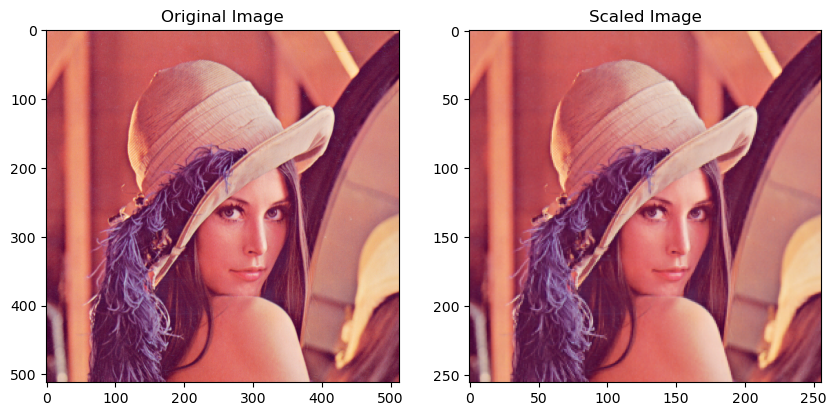

In [5]:
rgb_img = cv2.imread("images/lena.png", cv2.IMREAD_COLOR_RGB)
scaled_img = cv2.resize(rgb_img, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_LINEAR)

plt.figure(figsize = (10,20))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(rgb_img)
plt.subplot(1,2,2)
plt.title("Scaled Image")
plt.imshow(scaled_img)

### 2. Translation
Used to shift the image in X or Y or both direction. Mathematically it will use the last column of the 2x3 transformation matrix.

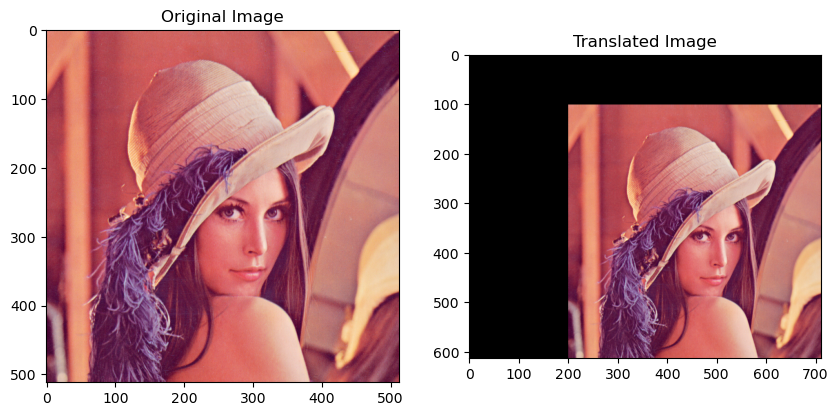

In [6]:
rows, cols = rgb_img.shape[:2]
M = np.float32([[1, 0, 200], [0, 1, 100]])  # transformation matrix
translated_img = cv2.warpAffine(rgb_img, M, (cols + int(M[0,2]), rows + int(M[1,2]))) # If we need the size of the final image as same as the original image we can remove the extra pixel additions

plt.figure(figsize = (10,20))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(rgb_img)
plt.subplot(1,2,2)
plt.title("Translated Image")
plt.imshow(translated_img)

### 3. Rotation
Rotate the Image with Image's center as origin by default but we can change the process by choosing a different parameter. 
Mathematically => New Point = M * Old Point where M i sthe Transformation Matrix of size 2x3. We need 2 points to compute the matrix since we have 4 unknowns ignoring the translation values.

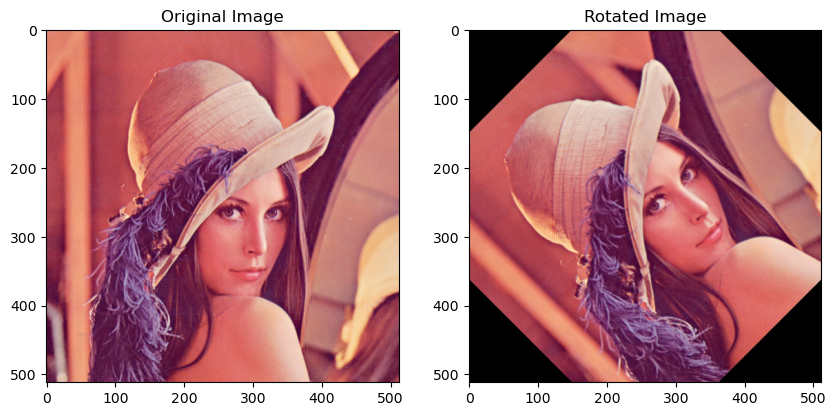

In [7]:
center = (cols // 2, rows // 2)
M = cv2.getRotationMatrix2D(center, angle=45, scale=1) # Will give us the rotation matrix. We can use (0,0) as the center if we do not wish to use the center of the image as origin
rotated_img = cv2.warpAffine(rgb_img, M, (cols, rows))

plt.figure(figsize = (10,20))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(rgb_img)
plt.subplot(1,2,2)
plt.title("Rotated Image")
plt.imshow(rotated_img)

### 4. Other Affine Transformations with different Scale values
To compute an affine transformation, we need three points since there are six unknown parameters to determine. this transformation will preserve the parallelism.
The relationship can be expressed as:\
New Point = M × Old Point\
Here, the transformation matrix M is a 2×3 matrix where: a, b, c, d represent rotation and scaling components, and tx, ty represent translation components.\
Each point provides two equations (one for x and one for y), resulting in a total of six equations—enough to solve for the six unknowns in the transformation matrix M.

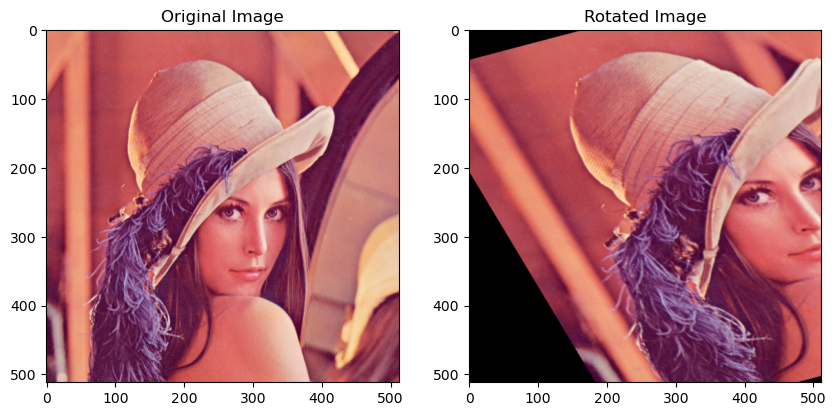

In [9]:
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)
affine_img = cv2.warpAffine(rgb_img, M, (cols, rows))

plt.figure(figsize = (10,20))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(rgb_img)
plt.subplot(1,2,2)
plt.title("Rotated Image")
plt.imshow(affine_img)

## Perpective Transform
A Perspective Transformation is a type of geometric transformation that maps points from one plane to another in such a way that parallel lines may no longer remain parallel. Unlike affine transformations, it does not preserve straight lines, angles, or parallelism, but it does preserve straightness—meaning lines remain lines, though their orientation and intersection may change.\
Mathematically, this relationship can be expressed as:\
New Point = M × Old Point
- M is a 3×3 transformation matrix containing 8 unknown parameters (the 9th is a scale factor, typically normalized to 1).
- Each point provides two equations; therefore, at least four point correspondences are required to compute the transformation matrix.
- The New Point is represented in homogeneous coordinates a 3D representation where the final 2D coordinates are obtained by normalizing (dividing by the third coordinate).

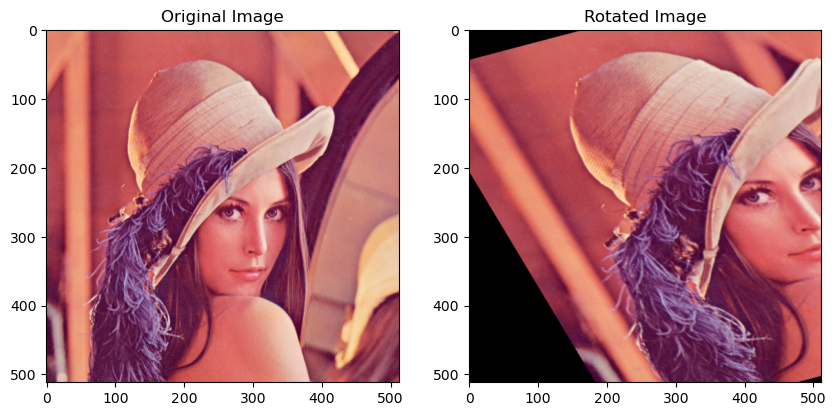

In [ ]:
pts1 = np.float32([[0,0],[100,100],[200,200],[300,300]])
pts2 = np.float32([[50,50],[100,100],[300,300],[400,400]])

M = cv2.getPerspectiveTransform(pts1, pts2)
perspective_img = cv2.warpPerspective(rgb_img, M, (300, 300))

plt.figure(figsize = (10,20))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(rgb_img)
plt.subplot(1,2,2)
plt.title("Perspectivs Image")
plt.imshow(perspective_img)


## Types of Interpolation
### 1. Nearest Neighbour
This will just take in the nearest neighbour value. x' = Round(x) and similarly for y'.
### 2. Bilinear Interpolation
Computes the weighted average of the 4 closest nearest neighbours. The weights are the difference between the actual position and the decimal difference.
### 3. Bi Cubic Interpolation
### 4. Lanczos Interpolation
### 5. Area Interpolation
Used for downscaling as it will take the arithmatic average of the pixels that contribute to the target pixel. For example if we downsample a 4x4 image into a 2x2 image. each pixel in the output image is influenced by 2x2 pixels. The final value is just the average of the 2x2 pixels. For downsampling it is similar to nearest neighbour approach.
### 6. Linear Exact

### 7. NEarest Exact